In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
BATCH_SIZE=32
IMG_SIZE=(224, 224)
SEED=123

In [3]:
train_dataset = image_dataset_from_directory("train", shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE, validation_split=0.2, subset="training", seed=SEED)

Found 92 files belonging to 3 classes.
Using 74 files for training.


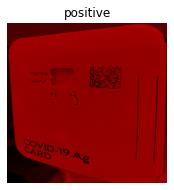

In [119]:
class_names = train_dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(1):
        ax = plt.subplot(3, 3, i + 1)
        im = images[i]
        c1 = tf.constant([1., 0., 0.])
        cnew = tf.broadcast_to(c1, [224, 224, 3])
        multied = cnew * im
        
#         print(multied)
        
        fv = tf.image.rgb_to_hsv(multied)
        # Saturate
        c1 = tf.constant([1., 5., 10.])
        satit = tf.broadcast_to(c1, [224, 224, 3])
        
        saturated = fv * satit
        back_again = tf.image.hsv_to_rgb(saturated)
        
        c = tf.constant([0.7])
        multi = tf.broadcast_to(c, [224,224, 3])
        m2 = multied * multi
        m2 = tf.clip_by_value(m2, clip_value_min = 0, clip_value_max=255)
        plt.imshow(m2.numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")